# <span style="color:green"> Import libraries<span style="color:green">

In [1]:
#Import all the required libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import random
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import Input, Dense, LeakyReLU, ReLU
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import pybiomart
from biomart import BiomartServer
from sklearn.feature_selection import RFECV

2024-04-18 14:07:29.165838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 14:07:29.165871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 14:07:29.166901: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 14:07:29.173031: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 14:07:30.117078: W tensorflow/compiler/tf2

# <span style="color:green"> ML for Feature Selection and Association <span style="color:green">

In [3]:
#Read the file 
df= pd.read_table("/home/vaishnavi/Downloads/Server_files_GI/GWAStutorialldlraw.raw", delim_whitespace= True)
print(df.head())
print("Shape of file", df.shape)

     FID  IID  PAT  MAT  SEX  PHENOTYPE  rs2980319_T  rs6685064_C  \
0  10004    1    0    0    2         75            2            1   
1  10005    1    0    0    1         69            2            2   
2  10007    1    0    0    1        108            2            2   
3  10008    1    0    0    1         94            2            2   
4  10009    1    0    0    1         92            2            2   

   rs2281173_G  rs10907187_G  ...  rs17001322_G  rs4141437_G  rs1033665_A  \
0            1             2  ...             2            2            2   
1            2             2  ...             2            2            2   
2            2             0  ...             2            2            2   
3            2             2  ...             2            2            2   
4            2             2  ...             2            2            2   

   rs5771133_T  rs3810974_C  rs138228_A  rs9617081_A  rs12484907_G  \
0            2            2           0            1

In [4]:
new_col_names= list(df.columns[:6])
new_col_names.extend([col_name[:-2] for col_name in df.columns[6:]])
df.columns=new_col_names
df.columns

Index(['FID', 'IID', 'PAT', 'MAT', 'SEX', 'PHENOTYPE', 'rs2980319',
       'rs6685064', 'rs2281173', 'rs10907187',
       ...
       'rs17001322', 'rs4141437', 'rs1033665', 'rs5771133', 'rs3810974',
       'rs138228', 'rs9617081', 'rs12484907', 'rs17248301', 'rs8139476'],
      dtype='object', length=69908)

In [5]:
#X is Independent feature and y is dependent feature
X= df.iloc[:, 6:]
print("Shape of X", X.shape)
y= df.PHENOTYPE
print("Shape of y", y.shape)

Shape of X (1282, 69902)
Shape of y (1282,)


In [6]:
#Train test data split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=2000)
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (897, 69902)
The dimension of X_test is (385, 69902)


## <span style="color:green"> LASSO <span style="color:green">

In [7]:
# Create and fit the LASSOCV model select 5000 SNP
lasso_cv = linear_model.LassoCV(alphas= [0.00045], cv=5, random_state=2000)

# Fit the model to the data
lasso_cv.fit(X,y)

#Print the optimal alpha value
print ("Optimal alpha:", lasso_cv.alpha_)

# Indices of the SNPs with non-zero coefficients
lasso_snps_ldl = np.where(lasso_cv.coef_)[0]

# See how many SNPs have a non-zero coefficient
print(len(lasso_snps_ldl), "selected SNPs")

#Final SNPs
l1= X.iloc[:,lasso_snps_ldl]
print("print shape of selected snps by lasso",l1.shape)


/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.377e+02, tolerance: 1.336e+02
  model = cd_fast.enet_coordinate_descent(
/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.548e+02, tolerance: 1.342e+02
  model = cd_fast.enet_coordinate_descent(
/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Optimal alpha: 0.00045
5003 selected SNPs
print shape of selected snps by lasso (1282, 5003)


/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.499e+02, tolerance: 1.605e+02
  model = cd_fast.enet_coordinate_descent(


### Linear regression

In [31]:
Y= df.PHENOTYPE.values
print("Y.shape",Y.shape)
x_train, x_test, Y_train, Y_test= train_test_split(l1, Y, test_size=0.3, random_state=2000)
print(f"x_train={x_train.shape}, x_test={x_test.shape}, Y_train= {Y_train.shape}, Y_test= {Y_test.shape}")
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

random.seed(2000)
model = linear_model.LinearRegression()
model.fit(x_train, Y_train)
y_pred = model.predict(x_test)
score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))

f_statistic, p_value = f_regression(l1, Y)
selected_p_indices = np.where(p_value < 5e-04)[0]
selected_p_values = p_value[selected_p_indices]
print("Selected p-values:")
print(selected_p_values)
print("Number of selected features:", len(selected_p_indices))
selected_f_values = f_statistic[selected_p_indices]
print("Selected F-values:")
print(selected_f_values)
top_f_indices = np.argsort(-selected_f_values)
print("Indices of selected features with top F-values:")
print(top_f_indices)
top_f_features = l1.iloc[:, selected_p_indices[top_f_indices]]
print("Top selected features:")
print(top_f_features)
lasso_LR_sigSNP=l1.iloc[:, selected_p_indices]
lasso_LR_sigSNP
lasso_LR_sig_col= list(lasso_LR_sigSNP.columns)
lasso_LR_sig_col

Y.shape (1282,)
x_train=(897, 5003), x_test=(385, 5003), Y_train= (897,), Y_test= (385,)
r2 is  0.013438791757887203
mean_absolute_error 16.056727661782173
mean_squared_error  391.95561760695495
explained_variance_score 0.6366066443871343
Selected p-values:
[1.48493427e-04 1.48716368e-04 1.88917447e-06 3.44002049e-05
 2.81399239e-04 2.66040812e-04 7.51106623e-06 3.27689686e-04
 4.12958057e-04 1.93547690e-04 4.95496983e-04 2.58446874e-04
 9.99684185e-05 2.66287381e-04 4.41330297e-04 7.70232631e-05
 4.51389062e-05 2.72387786e-04 2.39662858e-04 2.74804896e-04
 9.00855063e-05 8.81470583e-05 4.18217215e-04 3.48200414e-04
 4.02337062e-04]
Number of selected features: 25
Selected F-values:
[14.47810156 14.47524353 22.91615433 17.28005275 13.2637165  13.37005678
 20.2243956  12.97545378 12.53851375 13.97385957 12.19499885 13.42494892
 15.23314108 13.3683011  12.41316954 15.73198377 16.75729536 13.32537821
 13.56804547 13.30863907 15.43216881 15.47377989 12.5146353  12.86065801
 12.58768808]
In

['rs2207074',
 'rs11162662',
 'rs12034420',
 'rs11588607',
 'rs950968',
 'rs745534',
 'rs7580907',
 'rs13069172',
 'rs9882701',
 'rs4054037',
 'rs12499915',
 'rs12234019',
 'rs9375084',
 'rs10275038',
 'rs283735',
 'rs7839877',
 'rs10464982',
 'rs10868511',
 'rs454266',
 'rs7083079',
 'rs10895557',
 'rs12709295',
 'rs7232775',
 'rs2850544',
 'rs6089240']

### Random Forest

In [35]:
# Create a Random Forest Regressor
 #reate a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=9, min_samples_leaf=4, min_samples_split=2, 
                                     n_jobs=70,random_state=2000)

# Create RFECV object
rfecv = RFECV(estimator=rf_regressor, step=30, cv=5, scoring='neg_mean_squared_error', n_jobs=70)

# Fit RFECV on the training data
rfecv.fit(x_train, Y_train)

# Manually set the number of features you want to keep
desired_num_features =100
# Manually set the number of features you want to keep


# Get the selected features based on the desired number
selected_features = rfecv.get_support(indices=True)[:desired_num_features]
# Print the indices of the selected features
print("Selected features indices:", selected_features)

# Transform the training and testing data to keep only the selected features
X_train_selected = rfecv.transform(x_train)
X_test_selected = rfecv.transform(x_test)


# Get the optimal number of features
optimal_num_features = rfecv.n_features_

# Print the optimal number of features
#print(f"Optimal number of features: {optimal_num_features}")


# Train a Random Forest Regressor on the selected features
rf_regressor_selected = RandomForestRegressor(n_estimators=100, random_state=2000)
rf_regressor_selected.fit(X_train_selected, Y_train)

# Make predictions on the test set using the model with selected features
y_pred= rf_regressor_selected.predict(X_test_selected)
score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))
lasso_RF_sigSNP=l1.iloc[:,selected_features]
lasso_RF_sig_col= list(lasso_RF_sigSNP.columns)
lasso_RF_sig_col

Selected features indices: [  13   14   19   43   64   70   90   91   98  122  140  169  195  199
  207  224  238  245  262  263  278  279  297  305  344  352  365  438
  451  453  469  490  519  532  553  560  595  623  635  640  646  652
  681  686  692  749  791  794  805  864  867  870  872  888  896  902
  913  928  931  940  951  975  985 1025 1028 1029 1032 1035 1039 1053
 1060 1095 1120 1127 1136 1139 1155 1169 1175 1188 1191 1195 1202 1215
 1218 1239 1241 1258 1273 1274 1281 1290 1293 1307 1319 1324 1370 1375
 1379 1389]
r2 is  -41.106341808314696
mean_absolute_error 26.32997402597403
mean_squared_error  1053.6835277922078
explained_variance_score 0.021994776157934992


['rs12085743',
 'rs11587314',
 'rs12142584',
 'rs12078796',
 'rs1193219',
 'rs161807',
 'rs12125492',
 'rs4846216',
 'rs2379152',
 'rs12758763',
 'rs2235918',
 'rs2743208',
 'rs230175',
 'rs1043424',
 'rs3738091',
 'rs1555024',
 'rs4649033',
 'rs4659362',
 'rs9426278',
 'rs9286959',
 'rs592232',
 'rs728340',
 'rs7521293',
 'rs10798977',
 'rs1110113',
 'rs2484754',
 'rs12563174',
 'rs17108782',
 'rs9332417',
 'rs744748',
 'rs4278395',
 'rs1202824',
 'rs6676078',
 'rs2782549',
 'rs17318954',
 'rs11208264',
 'rs2863200',
 'rs535112',
 'rs2422137',
 'rs1405058',
 'rs7512474',
 'rs211764',
 'rs12125903',
 'rs473027',
 'rs11162662',
 'rs569399',
 'rs284152',
 'rs10874755',
 'rs1687949',
 'rs12023867',
 'rs10493973',
 'rs6658728',
 'rs2229783',
 'rs11581564',
 'rs2494067',
 'rs10494100',
 'rs3768480',
 'rs2786152',
 'rs1264897',
 'rs416269',
 'rs4838986',
 'rs7529979',
 'rs1146316',
 'rs4079531',
 'rs2335407',
 'rs759330',
 'rs11264640',
 'rs6694377',
 'rs6699950',
 'rs12726858',
 'rs7529215'

### Support Vector Machine

In [10]:
from sklearn.inspection import permutation_importance

svr = SVR(kernel = 'sigmoid' , C=100, epsilon= 0.01, gamma= 'scale', cache_size=800)
svr.fit(x_train, Y_train)
y_pred= svr.predict(x_test)
score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))
perm_importance= permutation_importance(svr, x_test, Y_test, n_repeats=10, random_state=2000, n_jobs=70)


imp_score=perm_importance.importances_mean
feature_indices = np.argsort(np.abs(imp_score))[::-1]
print(f"Selected feature indices are {feature_indices}")

# # Specify the number of features you want to select based on magnitude
num_selected_features = 100
top_100=feature_indices[:num_selected_features]
print(f"Top 100 fearure indices are {feature_indices}")
imp_score_100=imp_score[top_100]
print(f"Top 100 fearures permutation scores are {imp_score_100}")
lasso_SVR_sigSNP= l1.iloc[:,top_100]
lasso_SVR_sig_col= list(lasso_SVR_sigSNP.columns)
lasso_SVR_sig_col


r2 is  0.3806435235327482
mean_absolute_error 15.4160111992304
mean_squared_error  368.4706441246004
explained_variance_score 0.6590080478335235
Selected feature indices are [ 195   16  279 ... 4864 4284 2641]
Top 100 fearure indices are [ 195   16  279 ... 4864 4284 2641]
Top 100 fearures permutation scores are [ 0.0044551   0.00405564  0.0035911   0.00348645  0.00334798  0.00333564
  0.00319721  0.00313618  0.00291102  0.00288828  0.00285386  0.00277999
  0.00272193  0.00269328  0.00262814 -0.00254905  0.00253672  0.0025165
  0.00248202  0.00246589  0.00235486  0.00234187  0.00232866  0.00231725
  0.0023155  -0.00229463  0.00224888  0.00223841  0.00223746  0.00223322
  0.00223022  0.00221102  0.00217994  0.00215513  0.0021443   0.00211221
  0.00211111  0.00208573  0.00208295  0.0020819   0.00206477  0.00205406
  0.00200893  0.00200378  0.00200246  0.00198591 -0.00198194  0.0019648
  0.00193646  0.00192131  0.0019202   0.00191539  0.00191399  0.00191292
  0.00189504  0.00188998  0.001

['rs230175',
 'rs10737402',
 'rs728340',
 'rs12060187',
 'rs6425688',
 'rs950968',
 'rs2391973',
 'rs11588607',
 'rs3768480',
 'rs320011',
 'rs2863200',
 'rs454266',
 'rs2107126',
 'rs10494100',
 'rs9882701',
 'rs2932015',
 'rs1203660',
 'rs710218',
 'rs12037653',
 'rs41339145',
 'rs9375084',
 'rs13018470',
 'rs11162662',
 'rs10158553',
 'rs12137590',
 'rs12675110',
 'rs10864294',
 'rs2256977',
 'rs2294656',
 'rs745534',
 'rs7539380',
 'rs1767006',
 'rs2136844',
 'rs12034420',
 'rs9397199',
 'rs2043768',
 'rs7232775',
 'rs12470026',
 'rs17347194',
 'rs11585051',
 'rs10803063',
 'rs1358432',
 'rs1491198',
 'rs10497572',
 'rs11126315',
 'rs3863747',
 'rs6717602',
 'rs4054037',
 'rs1453012',
 'rs17573483',
 'rs9434741',
 'rs9695',
 'rs17276348',
 'rs320425',
 'rs10464982',
 'rs11576775',
 'rs264587',
 'rs9819557',
 'rs6689738',
 'rs5016700',
 'rs10776755',
 'rs7529265',
 'rs7562894',
 'rs1024537',
 'rs11209782',
 'rs370325',
 'rs1277014',
 'rs17477667',
 'rs12612477',
 'rs703151',
 'rs758

## <span style="color:green"> Ridge<span style="color:green">

In [8]:
# Create and fit the RidgeCV model select 5000 SNP
ridge_cv = linear_model.RidgeCV(alphas=[0.005], cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X, y)

# Optimal alpha value
print("Optimal alpha:", ridge_cv.alpha_)

# Indices of the SNPs with non-zero coefficients
ridge_snps_ldl = np.where(ridge_cv.coef_)[0]

# Select coefficients with non-zero values
selected_features = ridge_cv.coef_ != 0

# Select coefficients of selected SNPs
coefficients = ridge_cv.coef_[selected_features]

# Get the indices of the top 5000 SNPs based on descending coefficients
top_n = 5000
sorted_indices = np.argsort(-coefficients)
selected_indices = sorted_indices[:top_n]

# Print the indices of selected SNPs and the number of selected SNPs
print("Selected SNPs indices based on top coefficients:", selected_indices)
print(len(selected_indices), "selected SNPs")

#Maximum Coefficient
print("Maximum value of coefficient", coefficients.max())

#Final SNPs
R1= X.iloc[:,selected_indices]
print("print shape of selected snps by Ridge",R1.shape)


Optimal alpha: 0.005
Selected SNPs indices based on top coefficients: [67847  5994 16614 ... 10679 20908 16917]
5000 selected SNPs
Maximum value of coefficient 0.17897713157981698
print shape of selected snps by Ridge (1282, 5000)


### Linear Regression

In [12]:
Y= df.PHENOTYPE.values
print("Y.shape",Y.shape)
x_train, x_test, Y_train, Y_test= train_test_split(R1, Y, test_size=0.3, random_state=2000)
print(f"x_train={x_train.shape}, x_test={x_test.shape}, Y_train= {Y_train.shape}, Y_test= {Y_test.shape}")
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

Y.shape (1282,)
x_train=(897, 5000), x_test=(385, 5000), Y_train= (897,), Y_test= (385,)


In [13]:
random.seed(2000)
model = linear_model.LinearRegression()
model.fit(x_train, Y_train)
y_pred = model.predict(x_test)
score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))

f_statistic, p_value = f_regression(R1, Y)
selected_p_indices = np.where(p_value < 5e-04)[0]
selected_p_values = p_value[selected_p_indices]
print("Selected p-values:")
print(selected_p_values)
print("Number of selected features:", len(selected_p_indices))
selected_f_values = f_statistic[selected_p_indices]
print("Selected F-values:")
print(selected_f_values)
top_f_indices = np.argsort(-selected_f_values)
print("Indices of selected features with top F-values:")
print(top_f_indices)
top_f_features = R1.iloc[:, selected_p_indices[top_f_indices]]
print("Top selected features:")
print(top_f_features)
Ridge_LR_sigSNP=R1.iloc[:, selected_p_indices]
Ridge_LR_sigSNP
Ridge_LR_sig_col= list(Ridge_LR_sigSNP.columns)
Ridge_LR_sig_col

r2 is  0.6034449406629253
mean_absolute_error 11.576119452686955
mean_squared_error  221.56389488084804
explained_variance_score 0.7941732648183302
Selected p-values:
[4.02337062e-04 2.81399239e-04 1.93547690e-04 8.57796102e-05
 2.39662858e-04 4.95496983e-04 4.18217215e-04 9.99684185e-05
 9.00855063e-05 1.48716368e-04 4.37850383e-04 4.09488131e-04
 4.12958057e-04 2.72387786e-04 7.70232631e-05 4.70115581e-04
 3.33028060e-04 1.06633457e-04]
Number of selected features: 18
Selected F-values:
[12.58768808 13.2637165  13.97385957 15.52586906 13.56804547 12.19499885
 12.5146353  15.23314108 15.43216881 14.47524353 12.42809802 12.55443728
 12.53851375 13.32537821 15.73198377 12.29406059 12.9448915  15.1098174 ]
Indices of selected features with top F-values:
[14  3  8  7 17  9  2  4 13  1 16  0 11 12  6 10 15  5]
Top selected features:
      rs7839877  rs3017499  rs10895557  rs9375084  rs3779536  rs11162662  \
0             1          1           2          2          1           0   
1      

['rs6089240',
 'rs950968',
 'rs4054037',
 'rs3017499',
 'rs454266',
 'rs12499915',
 'rs7232775',
 'rs9375084',
 'rs10895557',
 'rs11162662',
 'rs1567656',
 'rs2239728',
 'rs9882701',
 'rs10868511',
 'rs7839877',
 'rs6479357',
 'rs9556593',
 'rs3779536']

### Random Forest

In [14]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=9, min_samples_leaf=4, min_samples_split=2, 
                                     n_jobs=10,random_state=2000)

# Create RFECV object
rfecv = RFECV(estimator=rf_regressor, step=30, cv=5, scoring='neg_mean_squared_error', n_jobs=4)

# Fit RFECV on the training data
rfecv.fit(x_train, Y_train)

# Manually set the number of features you want to keep
desired_num_features =100
# Manually set the number of features you want to keep


# Get the selected features based on the desired number
selected_features = rfecv.get_support(indices=True)[:desired_num_features]
# Print the indices of the selected features
print("Selected features indices:", selected_features)

# Transform the training and testing data to keep only the selected features
X_train_selected = rfecv.transform(x_train)[:, selected_features]
X_test_selected = rfecv.transform(x_test)[:, selected_features]


# Get the optimal number of features
optimal_num_features = rfecv.n_features_

# Print the optimal number of features
#print(f"Optimal number of features: {optimal_num_features}")


# Train a Random Forest Regressor on the selected features
rf_regressor_selected = RandomForestRegressor(n_estimators=100, random_state=2000)
rf_regressor_selected.fit(X_train_selected, Y_train)

# Make predictions on the test set using the model with selected features
y_pred = rf_regressor_selected.predict(X_test_selected)

score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))
Ridge_RF_sigSNP=R1.iloc[:,selected_features]
Ridge_RF_sig_col= list(Ridge_RF_sigSNP.columns)
Ridge_RF_sig_col

Selected features indices: [  0   1   2   3   5   6   7   9  11  13  14  15  16  17  18  19  20  21
  22  25  27  28  29  30  31  32  34  35  36  37  38  40  42  43  44  46
  47  48  51  52  54  58  59  61  63  64  65  66  68  71  74  75  77  78
  79  81  82  83  84  85  86  93  94  95 100 105 107 110 111 112 113 115
 116 118 120 122 123 124 125 126 128 130 133 134 135 137 138 140 141 142
 143 144 147 149 151 152 153 154 155 156]
r2 is  -16.3441141758561
mean_absolute_error 25.972415584415582
mean_squared_error  1030.4253854545454
explained_variance_score 0.05089197875277074


['rs6089240',
 'rs950968',
 'rs4054037',
 'rs3017499',
 'rs2159023',
 'rs9695',
 'rs12499915',
 'rs2413146',
 'rs9375084',
 'rs10505328',
 'rs7943132',
 'rs10458884',
 'rs1896384',
 'rs9583438',
 'rs10921585',
 'rs2391973',
 'rs2854311',
 'rs3897732',
 'rs6473200',
 'rs325416',
 'rs7760664',
 'rs9465170',
 'rs17804008',
 'rs1155993',
 'rs2019917',
 'rs7717186',
 'rs6735163',
 'rs7741680',
 'rs10230715',
 'rs11162662',
 'rs3768480',
 'rs7302554',
 'rs2241490',
 'rs475235',
 'rs848481',
 'rs11642880',
 'rs2063244',
 'rs1815438',
 'rs9998420',
 'rs4952971',
 'rs7078711',
 'rs4243923',
 'rs3748221',
 'rs5016700',
 'rs10803063',
 'rs11183575',
 'rs12474591',
 'rs9305990',
 'rs6459166',
 'rs10116267',
 'rs4256438',
 'rs1566516',
 'rs6712089',
 'rs1240259',
 'rs1010988',
 'rs2297240',
 'rs1985266',
 'rs10898165',
 'rs2239728',
 'rs7244347',
 'rs320011',
 'rs2170573',
 'rs10739282',
 'rs1474016',
 'rs7194855',
 'rs1398295',
 'rs4732439',
 'rs7303387',
 'rs10794057',
 'rs11680095',
 'rs7970389'

### Support Vector Machine

In [19]:
from sklearn.inspection import permutation_importance

svr = SVR(kernel = 'sigmoid' , C=100, epsilon= 0.01, gamma= 'scale', cache_size=800)
svr.fit(x_train, Y_train)
y_pred= svr.predict(x_test)
score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))
perm_importance= permutation_importance(svr, x_test, Y_test, n_repeats=10, random_state=2000, n_jobs=70)


imp_score=perm_importance.importances_mean
feature_indices = np.argsort(np.abs(imp_score))[::-1]
print(f"Selected feature indices are {feature_indices}")

# # Specify the number of features you want to select based on magnitude
num_selected_features = 100
top_100=feature_indices[:num_selected_features]
print(f"Top 100 fearure indices are {feature_indices}")
imp_score_100=imp_score[top_100]
print(f"Top 100 fearures permutation scores are {imp_score_100}")

Ridge_SVR_sigSNP= R1.iloc[:,top_100]
Ridge_SVR_sig_col= list(Ridge_SVR_sigSNP.columns)
Ridge_SVR_sig_col

r2 is  0.6937856175180555
mean_absolute_error 11.597831965819362
mean_squared_error  221.3076822487228
explained_variance_score 0.7943648189631427
Selected feature indices are [ 518  729  382 ... 2724 4511 4919]
Top 100 fearure indices are [ 518  729  382 ... 2724 4511 4919]
Top 100 fearures permutation scores are [ 0.00178392 -0.001729    0.00131079  0.00130039  0.00128264  0.0012806
  0.00122967  0.00120573  0.00118648 -0.00117974  0.00117557  0.0011748
 -0.00115149  0.00114413  0.00113146  0.00113031  0.00112176  0.00111981
  0.00111908 -0.00111528  0.00108578  0.00107558  0.00106525  0.0010649
 -0.0010562  -0.00105596  0.00104712 -0.00103369 -0.00102809  0.00102019
  0.00101848  0.00100477  0.00100023  0.00099887  0.00099739  0.00099295
 -0.00098761  0.00098128  0.00097887 -0.00096576  0.00096347  0.00096188
  0.00095522  0.00094562  0.00094329 -0.00093708  0.00093611  0.00093036
  0.00092434  0.00092195  0.00092017  0.00091902  0.00091788  0.00091371
  0.00091339  0.00091246  0.00

['rs9913863',
 'rs621638',
 'rs11206577',
 'rs12379687',
 'rs3108181',
 'rs11642880',
 'rs17493901',
 'rs34246750',
 'rs17714238',
 'rs2404206',
 'rs11873737',
 'rs1759402',
 'rs12432614',
 'rs6048344',
 'rs4665075',
 'rs10494603',
 'rs7992848',
 'rs17288133',
 'rs13334680',
 'rs10983088',
 'rs9459465',
 'rs17056205',
 'rs4463073',
 'rs9511479',
 'rs4478161',
 'rs7238618',
 'rs7375020',
 'rs353372',
 'rs6118016',
 'rs652099',
 'rs11152393',
 'rs10502444',
 'rs2391973',
 'rs7302554',
 'rs2825645',
 'rs7299612',
 'rs6508347',
 'rs604777',
 'rs2283004',
 'rs7789583',
 'rs17385318',
 'rs7329122',
 'rs9567431',
 'rs6742401',
 'rs1815438',
 'rs220541',
 'rs3764134',
 'rs594226',
 'rs7214255',
 'rs2144862',
 'rs1720971',
 'rs2904347',
 'rs7607339',
 'rs12733612',
 'rs3829183',
 'rs10197817',
 'rs7327101',
 'rs6981562',
 'rs1009989',
 'rs575321',
 'rs9401599',
 'rs6834821',
 'rs10115017',
 'rs644454',
 'rs7658061',
 'rs9308440',
 'rs4306817',
 'rs6889575',
 'rs443378',
 'rs17796714',
 'rs70998

## <span style="color:green"> Elastic net<span style="color:green">

In [9]:
# Create and fit the Elasticnet model
elastic_cv = linear_model.ElasticNetCV(l1_ratio=[0.5],alphas=[0.0033], cv=5, random_state= 2000)
elastic_cv.fit(X, y)

# Print the optimal alpha value
print ("Optimal alpha:", elastic_cv.alpha_)
print("Optimal l1_ratio: ", elastic_cv.l1_ratio_)

# Indices of the SNPs with non-zero coefficients
elastic_snps_ldl = np.where(elastic_cv.coef_)[0]

# See how many SNPs have a non-zero coefficient
print(len(elastic_snps_ldl), "selected SNPs")

#Final SNPs
E1= X.iloc[:,elastic_snps_ldl]
print("print shape of selected snps by Elastic net",E1.shape)

/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.977e+02, tolerance: 1.336e+02
  model = cd_fast.enet_coordinate_descent(
/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.556e+02, tolerance: 1.342e+02
  model = cd_fast.enet_coordinate_descent(
/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Optimal alpha: 0.0033
Optimal l1_ratio:  0.5
5037 selected SNPs
print shape of selected snps by Elastic net (1282, 5037)


/home/vaishnavi/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.031e+02, tolerance: 1.605e+02
  model = cd_fast.enet_coordinate_descent(


### Linear Regression

In [74]:
Y= df.PHENOTYPE.values
print("Y.shape",Y.shape)
x_train, x_test, Y_train, Y_test= train_test_split(E1, Y, test_size=0.3, random_state=2000)
print(f"x_train={x_train.shape}, x_test={x_test.shape}, Y_train= {Y_train.shape}, Y_test= {Y_test.shape}")
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

Y.shape (1282,)
x_train=(897, 5037), x_test=(385, 5037), Y_train= (897,), Y_test= (385,)


In [23]:
random.seed(2000)
model = linear_model.LinearRegression()
model.fit(x_train, Y_train)
y_pred = model.predict(x_test)
score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))

f_statistic, p_value = f_regression(E1, Y)
selected_p_indices = np.where(p_value < 5e-04)[0]
selected_p_values = p_value[selected_p_indices]
print("Selected p-values:")
print(selected_p_values)
print("Number of selected features:", len(selected_p_indices))
selected_f_values = f_statistic[selected_p_indices]
print("Selected F-values:")
print(selected_f_values)
top_f_indices = np.argsort(-selected_f_values)
print("Indices of selected features with top F-values:")
print(top_f_indices)
top_f_features = E1.iloc[:, selected_p_indices[top_f_indices]]
print("Top selected features:")
print(top_f_features)
Elasticnet_LR_sigSNP=E1.iloc[:, selected_p_indices]
Elasticnet_LR_sigSNP
Elasticnet_LR_sig_col= list(Elasticnet_LR_sigSNP.columns)
Elasticnet_LR_sig_col

r2 is  0.7356994308414024
mean_absolute_error 9.961057916168222
mean_squared_error  145.51191974929068
explained_variance_score 0.8648870835124843
Selected p-values:
[1.48493427e-04 1.48716368e-04 1.88917447e-06 3.44002049e-05
 2.81399239e-04 2.66040812e-04 7.51106623e-06 3.27689686e-04
 4.12958057e-04 4.09488131e-04 1.93547690e-04 4.95496983e-04
 4.39280081e-04 2.58446874e-04 9.99684185e-05 4.14171870e-04
 2.66287381e-04 6.95676378e-05 4.41330297e-04 7.70232631e-05
 4.51389062e-05 2.72387786e-04 4.70115581e-04 2.39662858e-04
 2.74804896e-04 8.57796102e-05 9.00855063e-05 8.81470583e-05
 3.16260510e-04 4.18217215e-04 4.37850383e-04 3.48200414e-04
 4.02337062e-04 3.86573098e-04]
Number of selected features: 34
Selected F-values:
[14.47810156 14.47524353 22.91615433 17.28005275 13.2637165  13.37005678
 20.2243956  12.97545378 12.53851375 12.55443728 13.97385957 12.19499885
 12.4219503  13.42494892 15.23314108 12.53297545 13.3683011  15.92702285
 12.41316954 15.73198377 16.75729536 13.3253

['rs2207074',
 'rs11162662',
 'rs12034420',
 'rs11588607',
 'rs950968',
 'rs745534',
 'rs7580907',
 'rs13069172',
 'rs9882701',
 'rs2239728',
 'rs4054037',
 'rs12499915',
 'rs12517981',
 'rs12234019',
 'rs9375084',
 'rs802790',
 'rs10275038',
 'rs11784756',
 'rs283735',
 'rs7839877',
 'rs10464982',
 'rs10868511',
 'rs6479357',
 'rs454266',
 'rs7083079',
 'rs3017499',
 'rs10895557',
 'rs12709295',
 'rs17655474',
 'rs7232775',
 'rs1567656',
 'rs2850544',
 'rs6089240',
 'rs9983361']

### Random Forest

In [24]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=9, min_samples_leaf=4, min_samples_split=2, 
                                     n_jobs=70,random_state=2000)

# Create RFECV object
rfecv = RFECV(estimator=rf_regressor, step=30, cv=5, scoring='neg_mean_squared_error', n_jobs=70)

# Fit RFECV on the training data
rfecv.fit(x_train, Y_train)

# Manually set the number of features you want to keep
desired_num_features =100
# Manually set the number of features you want to keep


# Get the selected features based on the desired number
selected_features = rfecv.get_support(indices=True)[:desired_num_features]
# Print the indices of the selected features
print("Selected features indices:", selected_features)

# Transform the training and testing data to keep only the selected features
X_train_selected = rfecv.transform(x_train)[:, selected_features]
X_test_selected = rfecv.transform(x_test)[:, selected_features]


# Get the optimal number of features
optimal_num_features = rfecv.n_features_

# Print the optimal number of features
#print(f"Optimal number of features: {optimal_num_features}")


# Train a Random Forest Regressor on the selected features
rf_regressor_selected = RandomForestRegressor(n_estimators=100, random_state=2000)
rf_regressor_selected.fit(X_train_selected, Y_train)

# Make predictions on the test set using the model with selected features
y_pred= rf_regressor_selected.predict(X_test_selected)
score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))
Elasticnet_RF_sigSNP=E1.iloc[:,selected_features]
Elasticnet_RF_sig_col= list(Elasticnet_RF_sigSNP.columns)
Elasticnet_RF_sig_col

Selected features indices: [  0   3   4   5   6   8  10  13  18  22  23  24  28  33  37  41  42  43
  46  48  49  52  53  56  61  64  67  68  71  75  76  77  78  79  80  81
  82  89  96 100 102 107 108 109 114 117 119 122 123 126 127 128 129 132
 136 146 147 150 153 155 161 170 171 174 176 178 183 184 185 186 187 190
 192 194 195 197 201 202 205 206 210 212 214 220 226 230 232 233 238 242
 243 246 250 253 256 261 267 268 269 276]
r2 is  -13.749026482898419
mean_absolute_error 26.018259740259737
mean_squared_error  1028.2934449350648
explained_variance_score 0.04871531452940969


['rs6680471',
 'rs9434741',
 'rs161807',
 'rs2239561',
 'rs4846216',
 'rs1203660',
 'rs11812087',
 'rs12037653',
 'rs230175',
 'rs4654352',
 'rs6425878',
 'rs728340',
 'rs10798977',
 'rs10788977',
 'rs12117475',
 'rs2207074',
 'rs11208264',
 'rs716592',
 'rs1245054',
 'rs11209782',
 'rs1491198',
 'rs12025413',
 'rs11162351',
 'rs11162662',
 'rs4907110',
 'rs11161997',
 'rs1687949',
 'rs11165406',
 'rs10875133',
 'rs12748695',
 'rs2086853',
 'rs6658728',
 'rs3768480',
 'rs1857512',
 'rs10776755',
 'rs1146316',
 'rs10458586',
 'rs11264640',
 'rs12034420',
 'rs7525163',
 'rs12239036',
 'rs859725',
 'rs3829799',
 'rs12074053',
 'rs2495474',
 'rs1327440',
 'rs4657960',
 'rs12048004',
 'rs2821309',
 'rs3087949',
 'rs4605',
 'rs1933539',
 'rs11240701',
 'rs11584983',
 'rs182743',
 'rs4428898',
 'rs12116864',
 'rs4846376',
 'rs751685',
 'rs237789',
 'rs10864720',
 'rs11588607',
 'rs10802916',
 'rs12128430',
 'rs949634',
 'rs10926800',
 'rs10802219',
 'rs6726475',
 'rs6707574',
 'rs11687349',
 

### Support Vector Regression

In [75]:
from sklearn.inspection import permutation_importance

svr = SVR(kernel = 'sigmoid' , C=100, epsilon= 0.01, gamma= 'scale', cache_size=800)
svr.fit(x_train, Y_train)
y_pred= svr.predict(x_test)
score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))
perm_importance= permutation_importance(svr, x_test, Y_test, n_repeats=10, random_state=2000, n_jobs=70)


imp_score=perm_importance.importances_mean
feature_indices = np.argsort(np.abs(imp_score))[::-1]
print(f"Selected feature indices are {feature_indices}")

# # Specify the number of features you want to select based on magnitude
num_selected_features = 100
top_100=feature_indices[:num_selected_features]
print(f"Top 100 fearure indices are {feature_indices}")
imp_score_100=imp_score[top_100]
print(f"Top 100 fearures permutation scores are {imp_score_100}")

Elasticnet_SVR_sigSNP= E1.iloc[:,top_100]
Elasticnet_SVR_sig_col= list(Elasticnet_SVR_sigSNP.columns)
Elasticnet_SVR_sig_col

r2 is  0.8448151142382793
mean_absolute_error 8.666417701049134
mean_squared_error  109.56588942945788
explained_variance_score 0.8982207596651699
Selected feature indices are [3894  195  966 ... 3485 1758 1884]
Top 100 fearure indices are [3894  195  966 ... 3485 1758 1884]
Top 100 fearures permutation scores are [ 0.00155645  0.00132419  0.00125433  0.00119996  0.00114154  0.00111626
  0.00105201  0.00099316  0.00095733  0.00093523  0.00093354  0.00093011
  0.00092242  0.00088995  0.00088454  0.0008684   0.0008683   0.00085513
  0.00085313  0.00082472  0.00082466  0.00082261  0.00080978  0.00080837
  0.00080461  0.00079833  0.00079185  0.00079011  0.00077997  0.00077724
  0.00077379  0.00077199  0.00076873  0.00076636  0.00076363  0.00075986
  0.00075352  0.00075319  0.00075027  0.00074325  0.00073745  0.0007329
  0.00073202  0.00073169  0.00072906  0.00072898  0.00071806  0.0007141
  0.00071254  0.00071071  0.00070758  0.00070249 -0.00070217  0.0006951
  0.00069136  0.00068802  0.00

['rs3017499',
 'rs950968',
 'rs2136844',
 'rs1013192',
 'rs29795',
 'rs7800398',
 'rs9301479',
 'rs9695',
 'rs9298320',
 'rs2063244',
 'rs1952183',
 'rs11784756',
 'rs2201409',
 'rs12499915',
 'rs1896384',
 'rs12680681',
 'rs10890879',
 'rs636926',
 'rs848481',
 'rs7232775',
 'rs4917774',
 'rs17776811',
 'rs2483702',
 'rs7379705',
 'rs1453012',
 'rs3750164',
 'rs10464982',
 'rs6981562',
 'rs10201163',
 'rs324884',
 'rs10733392',
 'rs17366040',
 'rs6089240',
 'rs2059843',
 'rs6912831',
 'rs6903827',
 'rs10230715',
 'rs4054037',
 'rs11675322',
 'rs9375084',
 'rs9576907',
 'rs2029818',
 'rs3768480',
 'rs1039948',
 'rs454266',
 'rs4591370',
 'rs10892984',
 'rs10802219',
 'rs7698051',
 'rs188384',
 'rs9973340',
 'rs9561487',
 'rs17127435',
 'rs2019917',
 'rs810083',
 'rs1192439',
 'rs17559708',
 'rs10058089',
 'rs11642880',
 'rs1559439',
 'rs4717540',
 'rs3924222',
 'rs10887087',
 'rs2238090',
 'rs11530859',
 'rs12709295',
 'rs12438724',
 'rs4516649',
 'rs272709',
 'rs2020009',
 'rs6916224'

(array([ 2.,  0.,  0.,  0.,  0., 31., 52.,  9.,  5.,  1.]),
 array([-7.02172651e-04, -4.76310751e-04, -2.50448850e-04, -2.45869497e-05,
         2.01274951e-04,  4.27136851e-04,  6.52998752e-04,  8.78860652e-04,
         1.10472255e-03,  1.33058445e-03,  1.55644635e-03]),
 <BarContainer object of 10 artists>)

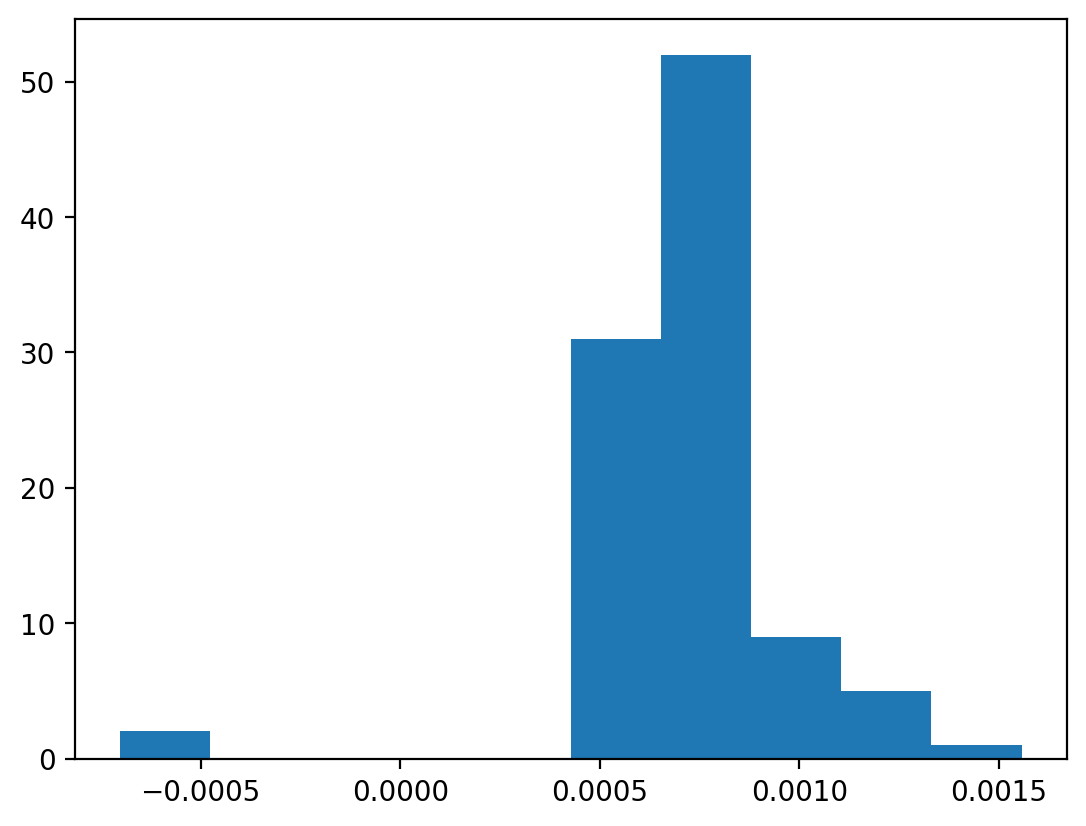

In [76]:
plt.hist(imp_score_100)

(array([3.000e+00, 5.800e+01, 8.800e+02, 3.083e+03, 7.830e+02, 1.630e+02,
        5.200e+01, 9.000e+00, 5.000e+00, 1.000e+00]),
 array([-7.02172651e-04, -4.76310751e-04, -2.50448850e-04, -2.45869497e-05,
         2.01274951e-04,  4.27136851e-04,  6.52998752e-04,  8.78860652e-04,
         1.10472255e-03,  1.33058445e-03,  1.55644635e-03]),
 <BarContainer object of 10 artists>)

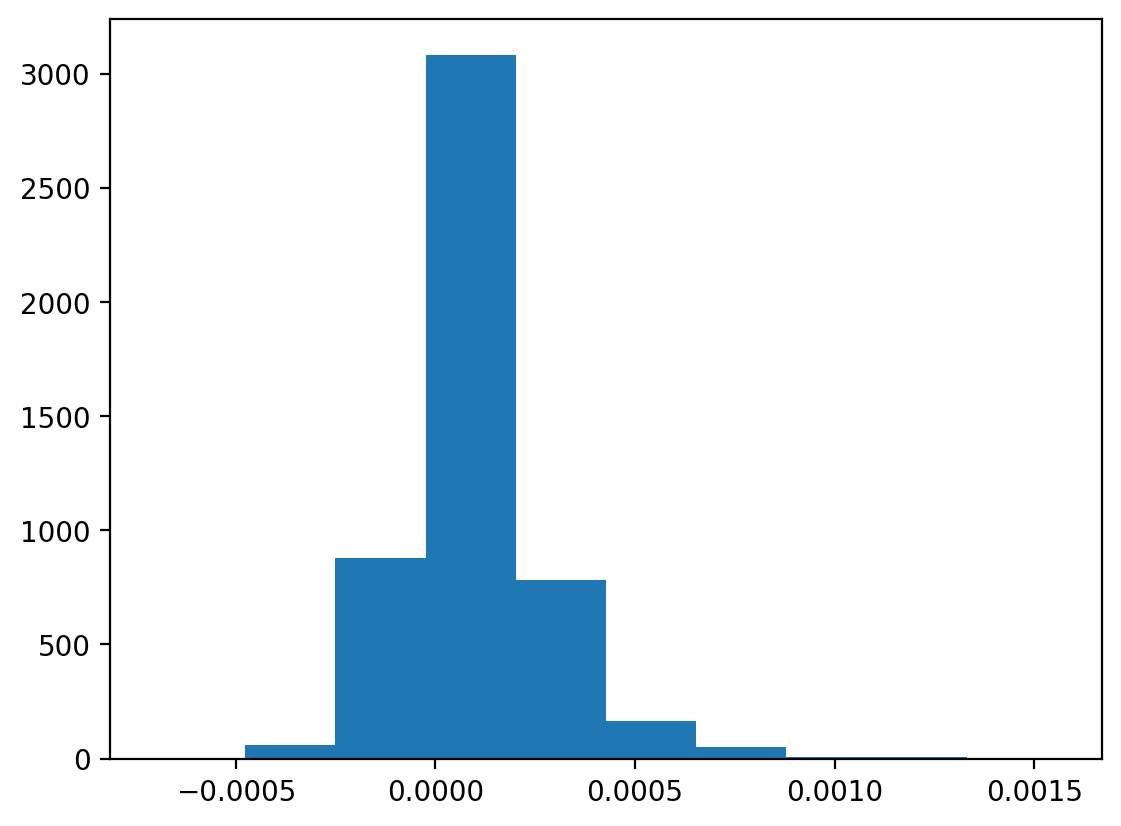

In [77]:
plt.hist(imp_score)

## <span style="color:green"> Mutual information <span style="color:green">

In [10]:
# Create and fit the Mutual_info model
mutual_info= mutual_info_regression(X, y, random_state=2000)
print("Length of mutal info", len(mutual_info))
mutual_info= pd.Series(mutual_info, index=df.columns[6:])

#Sort mutual_info values descending order
vdesc= mutual_info.sort_values(ascending=False)
vdesc_nonzero= vdesc[vdesc!=0]
print("Maximum value of mutualinfo", vdesc_nonzero.max)
print("Length of mutal info non zero", len(vdesc_nonzero))
k= np.where(vdesc_nonzero)
first_col= k[0]

#Selected 5000 SNPs
top5000 = 5000
mi_pos= first_col[:top5000]

#Final SNPs
M1= X.iloc[:,mi_pos]
print("print shape of selected snps by Mutual_info",M1.shape)

Length of mutal info 69902
Maximum value of mutualinfo <bound method NDFrame._add_numeric_operations.<locals>.max of rs6986075     7.731011e-02
rs12613647    7.726959e-02
rs506973      6.958074e-02
rs7958705     6.944823e-02
rs11911339    6.840407e-02
                  ...     
rs12961730    3.321579e-06
rs6124590     3.077126e-06
rs186736      2.612944e-06
rs11923778    6.053635e-07
rs13705       5.149567e-07
Length: 34273, dtype: float64>
Length of mutal info non zero 34273
print shape of selected snps by Mutual_info (1282, 5000)


### Linear Regression

In [37]:
Y= df.PHENOTYPE.values
print("Y.shape",Y.shape)
x_train, x_test, Y_train, Y_test= train_test_split(M1, Y, test_size=0.3, random_state=2000)
print(f"x_train={x_train.shape}, x_test={x_test.shape}, Y_train= {Y_train.shape}, Y_test= {Y_test.shape}")
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

Y.shape (1282,)
x_train=(897, 5000), x_test=(385, 5000), Y_train= (897,), Y_test= (385,)


In [38]:
random.seed(2000)
model = linear_model.LinearRegression()
model.fit(x_train, Y_train)
y_pred = model.predict(x_test)
score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))

f_statistic, p_value = f_regression(M1, Y)
selected_p_indices = np.where(p_value < 5e-04)[0]
selected_p_values = p_value[selected_p_indices]
print("Selected p-values:")
print(selected_p_values)
print("Number of selected features:", len(selected_p_indices))
selected_f_values = f_statistic[selected_p_indices]
print("Selected F-values:")
print(selected_f_values)
top_f_indices = np.argsort(-selected_f_values)
print("Indices of selected features with top F-values:")
print(top_f_indices)
top_f_features = M1.iloc[:, selected_p_indices[top_f_indices]]
print("Top selected features:")
print(top_f_features)
MI_LR_sigSNP=M1.iloc[:, selected_p_indices]
MI_LR_sigSNP
MI_LR_sig_col= list(MI_LR_sigSNP.columns)
MI_LR_sig_col

r2 is  -2.7062156158077073
mean_absolute_error 31.257174085961733
mean_squared_error  1467.4531942760675
explained_variance_score -0.3617295943021641
Selected p-values:
[1.48493427e-04 1.48716368e-04 1.88917447e-06]
Number of selected features: 3
Selected F-values:
[14.47810156 14.47524353 22.91615433]
Indices of selected features with top F-values:
[2 0 1]
Top selected features:
      rs12034420  rs2207074  rs11162662
0              2          2           0
1              2          1           2
2              2          2           2
3              2          1           1
4              2          2           2
...          ...        ...         ...
1277           1          2           2
1278           2          2           1
1279           2          2           1
1280           2          2           2
1281           2          2           2

[1282 rows x 3 columns]


['rs2207074', 'rs11162662', 'rs12034420']

### Random Forest

In [44]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=9, min_samples_leaf=4, min_samples_split=2, 
                                     n_jobs=70,random_state=2000)

# Create RFECV object
rfecv = RFECV(estimator=rf_regressor, step=30, cv=5, scoring='neg_mean_squared_error')

# Fit RFECV on the training data
rfecv.fit(x_train, Y_train)

# Manually set the number of features you want to keep
desired_num_features =100
# Manually set the number of features you want to keep


# Get the selected features based on the desired number
selected_features = rfecv.support_
# Print the indices of the selected features
print("Selected features indices:", selected_features)

# Transform the training and testing data to keep only the selected features
X_train_selected = rfecv.transform(x_train)
X_test_selected = rfecv.transform(x_test)


# Get the optimal number of features
optimal_num_features = rfecv.n_features_

# Print the optimal number of features
#print(f"Optimal number of features: {optimal_num_features}")


# Train a Random Forest Regressor on the selected features
rf_regressor_selected = RandomForestRegressor(n_estimators=100, random_state=2000)
rf_regressor_selected.fit(X_train_selected, Y_train)

# Make predictions on the test set using the model with selected features
y_pred= rf_regressor_selected.predict(X_test_selected)

score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))
MI_RF_sigSNP=M1.iloc[:,selected_features]
MI_RF_sig_col= list(MI_RF_sigSNP.columns)
MI_RF_sig_col

Selected features indices: [False False False ... False False False]
r2 is  -75.59472513650402
mean_absolute_error 26.451719178162453
mean_squared_error  1061.2521980529993
explained_variance_score 0.015694003645515986


['rs3768480']

### Support Vector Regressor

In [39]:
svr = SVR(kernel = 'sigmoid' , C=100, epsilon= 0.01, gamma= 'scale')
svr.fit(x_train, Y_train)
y_pred= svr.predict(x_test)
mae= print(f"MAE is {mean_absolute_error(Y_test, y_pred)}")
perm_importance= permutation_importance(svr, x_test, Y_test, n_repeats=10, random_state=2000, n_jobs=70)


imp_score=perm_importance.importances_mean
feature_indices = np.argsort(np.abs(imp_score))[::-1]
print(f"Selected feature indices are {feature_indices}")

# # Specify the number of features you want to select based on magnitude
num_selected_features = 100
top_100=feature_indices[:num_selected_features]
print(f"Top 100 fearure indices are {feature_indices}")
imp_score_100=imp_score[top_100]
print(f"Top 100 fearures permutation scores are {imp_score_100}")
score= r2_score(y_pred, Y_test)
print("r2 is ", score)
h= mean_absolute_error(y_pred,Y_test)
print("mean_absolute_error", h)
print("mean_squared_error ", mean_squared_error(y_pred, Y_test))
print("explained_variance_score", explained_variance_score(Y_test, y_pred))
MI_SVR_sigSNP= M1.iloc[:,top_100]
MI_SVR_sig_col= list(MI_SVR_sigSNP.columns)
MI_SVR_sig_col

MAE is 32.07399894842477
Selected feature indices are [4345 1353  522 ... 1581 3469 1132]
Top 100 fearure indices are [4345 1353  522 ... 1581 3469 1132]
Top 100 fearures permutation scores are [ 0.00986723  0.00712988  0.00707565  0.00707171 -0.00639316 -0.00628636
 -0.00600825  0.00584833  0.00573975  0.0057391  -0.00570125  0.00562331
 -0.00551894 -0.0054625   0.00535276  0.00534845 -0.00523899  0.00520659
 -0.00509769 -0.00489769  0.00479307 -0.00479139  0.00479016 -0.00478452
  0.00476302 -0.00474479  0.00470817 -0.0046986   0.00468844  0.0046755
 -0.00465466 -0.0046219  -0.00461118  0.00443314  0.00438158 -0.00426387
  0.004231   -0.00422371  0.00421849  0.00413825 -0.00410533 -0.00410158
  0.00406416  0.00404548  0.0040313  -0.00402596 -0.00401867  0.00400673
 -0.00400318 -0.00400266 -0.0039998   0.0039494   0.00393605 -0.00392514
 -0.00392195 -0.0039117   0.00389341 -0.00388987 -0.00386519 -0.00385925
 -0.00384703 -0.00383959  0.00383538  0.00382524  0.00382152  0.00376895
 -0.

['rs291092',
 'rs17117747',
 'rs230175',
 'rs490570',
 'rs6588193',
 'rs576736',
 'rs1529783',
 'rs2797257',
 'rs12116864',
 'rs315036',
 'rs10864392',
 'rs9657980',
 'rs12132707',
 'rs12758763',
 'rs320425',
 'rs1416152',
 'rs2428740',
 'rs1414277',
 'rs7545607',
 'rs1033636',
 'rs10494100',
 'rs10887978',
 'rs7539380',
 'rs338942',
 'rs1108866',
 'rs1928442',
 'rs604708',
 'rs12127497',
 'rs4653193',
 'rs11209782',
 'rs12726858',
 'rs6701215',
 'rs10864294',
 'rs3789484',
 'rs1277014',
 'rs164151',
 'rs4916239',
 'rs1107427',
 'rs11591044',
 'rs12037653',
 'rs6426343',
 'rs11589605',
 'rs2391973',
 'rs2066134',
 'rs17631994',
 'rs1546213',
 'rs3014861',
 'rs285377',
 'rs1031570',
 'rs12085004',
 'rs4657272',
 'rs11810583',
 'rs1132933',
 'rs529581',
 'rs6659177',
 'rs16830524',
 'rs1325290',
 'rs3820657',
 'rs7528732',
 'rs1356344',
 'rs12080323',
 'rs17130648',
 'rs17575128',
 'rs1552290',
 'rs11205252',
 'rs380546',
 'rs4915639',
 'rs12130438',
 'rs12142091',
 'rs946817',
 'rs75294

In [12]:
from venny4py.venny4py import *

In [11]:
p=set(list(l1.columns))
p
q= set(list(R1.columns))
q
r= set(list(E1.columns))
r
s= set(list(M1.columns))
s

{'rs12085743',
 'rs950369',
 'rs6679530',
 'rs2802720',
 'rs150892',
 'rs10921262',
 'rs10494675',
 'rs17471738',
 'rs10874274',
 'rs12070259',
 'rs1999270',
 'rs7529292',
 'rs6688436',
 'rs17019438',
 'rs1187806',
 'rs1281614',
 'rs807250',
 'rs6588196',
 'rs11102091',
 'rs7542458',
 'rs10157351',
 'rs12144629',
 'rs6427385',
 'rs11802042',
 'rs1040509',
 'rs17495607',
 'rs17412556',
 'rs12239399',
 'rs1281621',
 'rs450719',
 'rs613217',
 'rs4656855',
 'rs1984725',
 'rs3862955',
 'rs11579522',
 'rs10863439',
 'rs6661403',
 'rs10493345',
 'rs9439525',
 'rs11265093',
 'rs1031568',
 'rs2095300',
 'rs3890745',
 'rs12759150',
 'rs11207745',
 'rs10873935',
 'rs12403843',
 'rs957544',
 'rs10746446',
 'rs1008431',
 'rs6658728',
 'rs1998927',
 'rs9434615',
 'rs602668',
 'rs7366204',
 'rs6680026',
 'rs12126301',
 'rs2762849',
 'rs511201',
 'rs7512461',
 'rs17615285',
 'rs1198921',
 'rs1325222',
 'rs6686632',
 'rs4916264',
 'rs764742',
 'rs34415902',
 'rs12032512',
 'rs241237',
 'rs12063687',
 '

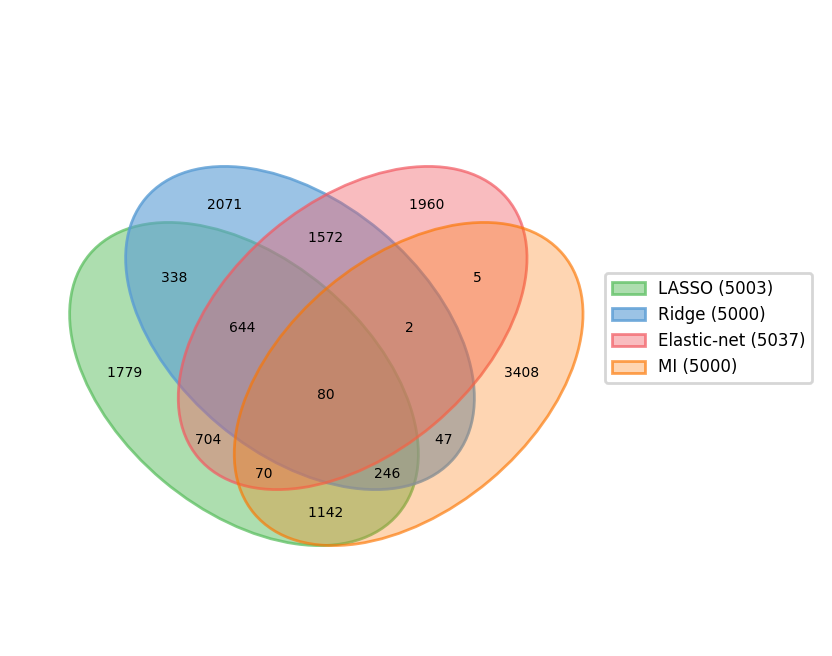

In [152]:
import venn
labels = venn.get_labels([p,q,r,s],fill=['number'])
fig, ax = venn.venn4(labels, names=['LASSO', 'Ridge','Elastic-net', 'MI'],
    colors=[[0.36, 0.75, 0.38, 0.5], [0.35, 0.61, 0.83, 0.6], [0.95, 0.35, 0.38, 0.4],
                            [0.99, 0.46, 0.0, 0.3],[0.32, 0.32, 0.75, 0.2]],
    figsize=(5.5,4),
    dpi=1200,
    fontsize=5)
plt.gca().legend(labels=['LASSO (5003)', 'Ridge (5000)','Elastic-net (5037)', 'MI (5000)'],loc='center right',
                 bbox_to_anchor=(1.3, 0.5),
                 fontsize=6)
plt.savefig('/home/vaishnavi/Documents/Vaishnavi/FS_venndiagram_new_2.pdf', dpi=1200)


## <span style="color:green"> SNP Enrichment <span style="color:green">

In [62]:
db_snp = pybiomart.Dataset('hsapiens_snp', host='http://www.ensembl.org')
db_snp.list_attributes().head(5)
#db_snp.list_filters()
snp_results=[]
for i in Elasticnet_SVR_sig_col:
    snp_ens = db_snp.query(attributes=['refsnp_id','refsnp_source_description','chr_name','chrom_start', 'phenotype_name',
                                     'consequence_type_tv', 'minor_allele', 'clinical_significance',
                                   'associated_gene',  'ensembl_gene_stable_id'],filters={'snp_filter':[i]})
    snp_results.append(snp_ens)
   
combined_df = pd.concat(snp_results, ignore_index=True)
output_csv_path = '/home/Vaishnavi/E1_SVR_Ensembl.csv'  
combined_df.to_csv(output_csv_path, index=False)
print(f"Saved combined data to {output_csv_path}")


Saved combined data to /home/Vaishnavi/E1_SVR_Ensembl.csv


In [64]:
snp_results

[  Variant name                         Variant source description  \
 0    rs3017499  Variants (including SNPs and indels) imported ...   
 
    Chromosome/scaffold name  Chromosome/scaffold position start (bp)  \
 0                        11                                 70832335   
 
    Phenotype name Variant consequence Minor allele (ALL)  \
 0             NaN      intron_variant                  C   
 
    Clinical significance  Associated gene with phenotype   Gene stable ID  
 0                    NaN                             NaN  ENSG00000162105  ,
   Variant name                         Variant source description  \
 0     rs950968  Variants (including SNPs and indels) imported ...   
 
    Chromosome/scaffold name  Chromosome/scaffold position start (bp)  \
 0                         2                                  8423196   
 
    Phenotype name  Variant consequence Minor allele (ALL)  \
 0             NaN                  NaN                  T   
 
    Clinical si

In [63]:
dataset = pybiomart.Dataset(name='hsapiens_gene_ensembl', host='http://www.ensembl.org')
l=[]
p=combined_df.iloc[:,9]
for i in p:
    
    o=dataset.query(attributes=['ensembl_gene_id', 'entrezgene_id','chromosome_name','description','hgnc_symbol','phenotype_description'],
             filters={'link_ensembl_gene_id': [i]})
    l.append(o)
    
gene_info= pd.concat(l)
print(gene_info)
output_csv_path = '/home/Vaishnavi/E1_SVR_phenoinfo.csv'  
gene_info.to_csv(output_csv_path, index=False)
print(f"Saved combined data to {output_csv_path}")

     Gene stable ID NCBI gene (formerly Entrezgene) ID  \
0   ENSG00000162105                              22941   
1   ENSG00000162105                              22941   
2   ENSG00000162105                              22941   
0   ENSG00000134516                               1794   
1   ENSG00000134516                               1794   
..              ...                                ...   
55  ENSG00000109906                               7704   
56  ENSG00000109906                               7704   
57  ENSG00000109906                               7704   
0   ENSG00000122547                              80820   
0   ENSG00000148219                              23245   

   Chromosome/scaffold name  \
0                        11   
1                        11   
2                        11   
0                         5   
1                         5   
..                      ...   
55                       11   
56                       11   
57                      